# 导包定义文件变量

In [1]:
# 导入相关包
%matplotlib inline
# 绘图包
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#定义文件名
ACTION_201602_FILE = "data/JData_Action_201602.csv"
ACTION_201603_FILE = "data/JData_Action_201603.csv"
ACTION_201604_FILE = "data/JData_Action_201604.csv"
COMMENT_FILE = "data/JData_Comment.csv"
PRODUCT_FILE = "data/JData_Product.csv"
USER_FILE = "data/JData_User.csv"
USER_TABLE_FILE = "data/User_table.csv"

# 周一到周日各天购买情况

## 定义提取购买数据函数

In [2]:
# 提取购买(type=4)的行为数据
def get_from_action_data(fname, chunk_size=50000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    # type=4,为购买
    df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["user_id", "sku_id", "time"]]

## 提取全部购买数据

In [3]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)
display(df_ac.head(),df_ac.shape)

Iteration is stopped
Iteration is stopped
Iteration is stopped


,user_id,sku_id,time
0,269365,166345,2016-02-01 00:01:00
1,235443,36692,2016-02-01 00:02:00
2,247689,9112,2016-02-01 00:03:00
3,273959,102034,2016-02-01 00:05:00
4,226791,163550,2016-02-01 00:06:00


(48252, 3)

In [4]:
df_ac.dtypes

user_id     int64
sku_id      int64
time       object
dtype: object

## 日期转换

In [5]:
# 将time字段转换为datetime类型
df_ac['time'] = pd.to_datetime(df_ac['time'])

display(df_ac.head(),df_ac.dtypes)

# 使用lambda匿名函数将时间time转换为星期(周一为1, 周日为７)
df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)
df_ac.head()

,user_id,sku_id,time
0,269365,166345,2016-02-01 00:01:00
1,235443,36692,2016-02-01 00:02:00
2,247689,9112,2016-02-01 00:03:00
3,273959,102034,2016-02-01 00:05:00
4,226791,163550,2016-02-01 00:06:00


user_id             int64
sku_id              int64
time       datetime64[ns]
dtype: object

,user_id,sku_id,time
0,269365,166345,1
1,235443,36692,1
2,247689,9112,1
3,273959,102034,1
4,226791,163550,1


In [6]:
df_ac['time'].unique()

array([1, 2, 3, 4, 5, 6, 7])

## 分组聚合数据汇总

In [7]:
# 周一到周日每天购买用户个数
df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['weekday', 'user_num']
df_user

,weekday,user_num
0,1,6162
1,2,6946
2,3,5001
3,4,6409
4,5,6049
5,6,4174
6,7,3710


In [10]:
# 周一到周日每天购买商品个数
df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['weekday', 'item_num']
df_item

,weekday,item_num
0,1,1844
1,2,1996
2,3,1800
3,4,1805
4,5,1855
5,6,1643
6,7,1578


In [8]:
# 周一到周日每天购买记录个数
df_ui = df_ac.groupby('time', as_index=False).size()
df_ui.columns = ['weekday', 'user_item_num']
df_ui

,weekday,user_item_num
0,1,7759
1,2,8869
2,3,6262
3,4,8078
4,5,7505
5,6,5143
6,7,4636


## 周购买情况数据可视化

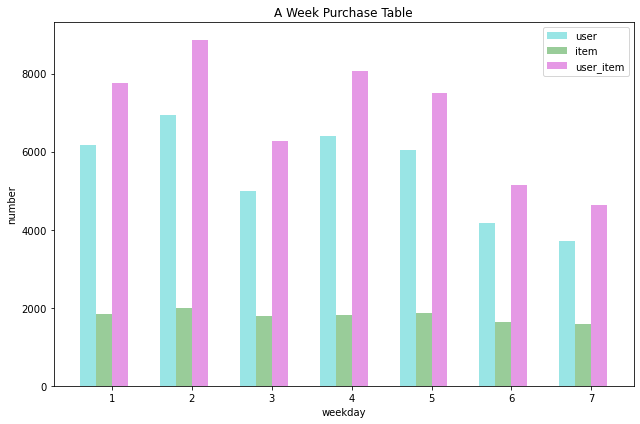

In [11]:
# 条形宽度
bar_width = 0.2
# 透明度
opacity = 0.4

plt.figure(figsize=(9,6))

plt.bar(df_user['weekday'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['weekday']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['weekday']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('weekday')
plt.ylabel('number')
plt.title('A Week Purchase Table')
plt.xticks(df_user['weekday'] + bar_width * 3 / 2., (1,2,3,4,5,6,7))

plt.tight_layout() 
plt.legend(prop={'size':10})

# plt.savefig('./10-周购买情况数据可视化.png',dpi = 200)

## 结论

周六，周日购买量较少（在玩，逛街，线下购物）

# 一个月中各天购买量

## 2016年2月

获取数据

In [12]:
df_ac = get_from_action_data(fname=ACTION_201602_FILE)
# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac['time'] = pd.to_datetime(df_ac['time']).apply(lambda x: x.day)
df_ac.head()

Iteration is stopped


,user_id,sku_id,time
351,269365,166345,1
649,235443,36692,1
980,247689,9112,1
1719,273959,102034,1
2153,226791,163550,1


In [13]:
df_ac['time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

分组聚合数据汇总

In [14]:
# 每天购买用户个数
df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['day', 'user_num']

# 每天购买用商品数
df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['day', 'item_num']

# 每天购买记录个数
df_ui = df_ac.groupby('time', as_index=False).size()
df_ui.columns = ['day', 'user_item_num']
df_ui

,day,user_item_num
0,1,539
1,2,462
2,3,357
3,4,297
4,5,179
5,6,134
6,7,107
7,8,109
8,9,127
9,10,150


2月购买情况可视化

In [15]:
df_user

,day,user_num
0,1,454
1,2,383
2,3,302
3,4,256
4,5,160
5,6,120
6,7,82
7,8,100
8,9,113
9,10,121


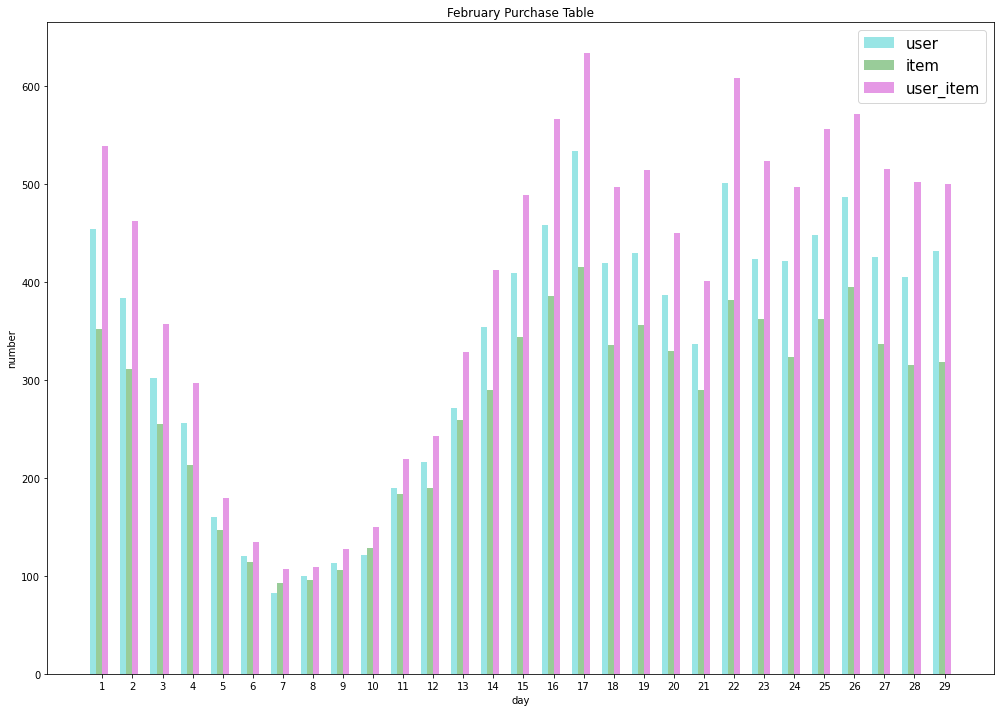

In [16]:
# 条形宽度
bar_width = 0.2
# 透明度
opacity = 0.4
# 天数
day_range = range(1,len(df_user['day']) + 1)
# 设置图片大小
plt.figure(figsize=(14,10))

plt.bar(df_user['day'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['day']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['day']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('day')
plt.ylabel('number')
plt.title('February Purchase Table')
plt.xticks(df_user['day'] + bar_width * 3 / 2., day_range)
plt.tight_layout() 
plt.legend(prop={'size':15})

# plt.savefig('./11-2月购买情况可视化.png',dpi = 200)

分析： 2月份5,6,7,8,9,10 这几天购买量非常少，原因可能是中国农历春节，快递不营业

## 2016年3月

加载数据分组聚合

In [17]:
df_ac = get_from_action_data(fname=ACTION_201603_FILE)
# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac['time'] = pd.to_datetime(df_ac['time']).apply(lambda x: x.day)

df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['day', 'user_num']

df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['day', 'item_num']

df_ui = df_ac.groupby('time', as_index=False).size()
df_ui.columns = ['day', 'user_item_num']
df_ui

Iteration is stopped


,day,user_item_num
0,1,1140
1,2,685
2,3,634
3,4,700
4,5,563
5,6,587
6,7,1416
7,8,757
8,9,601
9,10,929


3月购买情况可视化

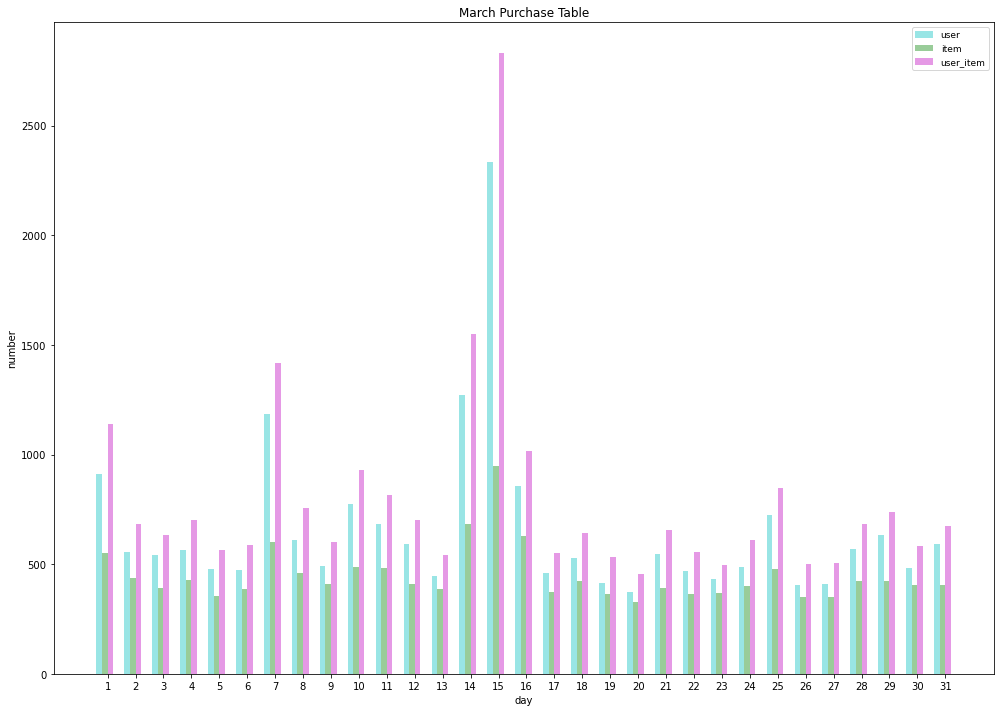

In [18]:
# 条形宽度
bar_width = 0.2
# 透明度
opacity = 0.4
# 天数
day_range = range(1,len(df_user['day']) + 1, 1)
# 设置图片大小
plt.figure(figsize=(14,10))

plt.bar(df_user['day'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['day']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['day']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('day')
plt.ylabel('number')
plt.title('March Purchase Table')
plt.xticks(df_user['day'] + bar_width * 3 / 2., day_range)
plt.tight_layout() 
plt.legend(prop={'size':9})
# plt.savefig('./12-3月购买情况可视化.png',dpi = 200)

分析：总体来看，购物记录多于2月份

## 2016年4月

加载数据分组聚合

In [19]:
df_ac = get_from_action_data(fname=ACTION_201604_FILE)

# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac['time'] = pd.to_datetime(df_ac['time']).apply(lambda x: x.day)

df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['day', 'user_num']

df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['day', 'item_num']

df_ui = df_ac.groupby('time', as_index=False).size()
df_ui.columns = ['day', 'user_item_num']

Iteration is stopped


4月购买情况可视化

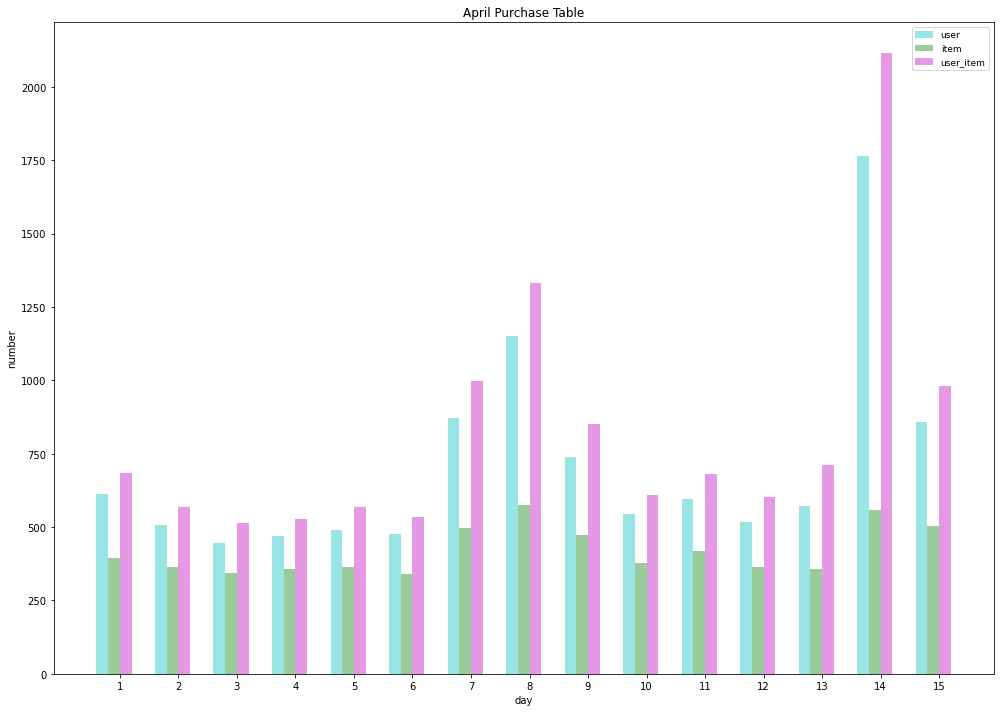

In [20]:
# 条形宽度
bar_width = 0.2
# 透明度
opacity = 0.4
# 天数
day_range = range(1,len(df_user['day']) + 1, 1)
# 设置图片大小
plt.figure(figsize=(14,10))

plt.bar(df_user['day'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['day']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['day']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('day')
plt.ylabel('number')
plt.title('April Purchase Table')
plt.xticks(df_user['day'] + bar_width * 3 / 2., day_range)

plt.tight_layout() 
plt.legend(prop={'size':9})
# plt.savefig('./14-4月购买情况可视化.png',dpi = 200)

分析：一脸懵逼中...可能又有啥节日？ 还是说每个月中旬都有较强的购物欲望？

# 周一到周日各商品类别销售情况

## 定义函数提取行为记录中商品类别数据

In [21]:
# 从行为记录中提取商品类别数据
def get_from_action_data(fname, chunk_size=50000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["cate", "brand", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    # type=4,为购买
    df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["cate", "brand", "type", "time"]]

## 提取全部商品类别数据

In [22]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)
# 将time字段转换为datetime类型
df_ac['time'] = pd.to_datetime(df_ac['time'])
# 使用lambda匿名函数将时间time转换为星期(周一为1, 周日为７)
df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)
# 观察有几个类别商品
df_ac.groupby(df_ac['cate']).count()

Iteration is stopped
Iteration is stopped
Iteration is stopped


,brand,type,time
cate,,,
4,9326,9326,9326
5,8138,8138,8138
6,6982,6982,6982
7,6214,6214,6214
8,13281,13281,13281
9,4104,4104,4104
10,189,189,189
11,18,18,18


## 商品不同类别销量可视化

In [23]:
# 查找自己电脑上的中文字体
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]  # Songti SC

['STIXSizeTwoSym',
 'cmmi10',
 'cmtt10',
 'STIXSizeFourSym',
 'cmex10',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmss10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmr10',
 'STIXGeneral',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'Noto Sans Elbasan',
 'Noto Sans Miao',
 'Noto Sans Javanese',
 'Noto Sans Bhaiksuki',
 'Noto Sans Caucasian Albanian',
 'Lucida Grande',
 'STIXIntegralsUp',
 'Apple SD Gothic Neo',
 'Farisi',
 'Lao Sangam MN',
 'Noto Sans Sharada',
 'Avenir Next',
 'Noto Sans Ol Chiki',
 'Cochin',
 'Noto Sans Kharoshthi',
 'Arial Unicode MS',
 '.SF Arabic

Text(0.5, 1.0, '不同商品周销量表')

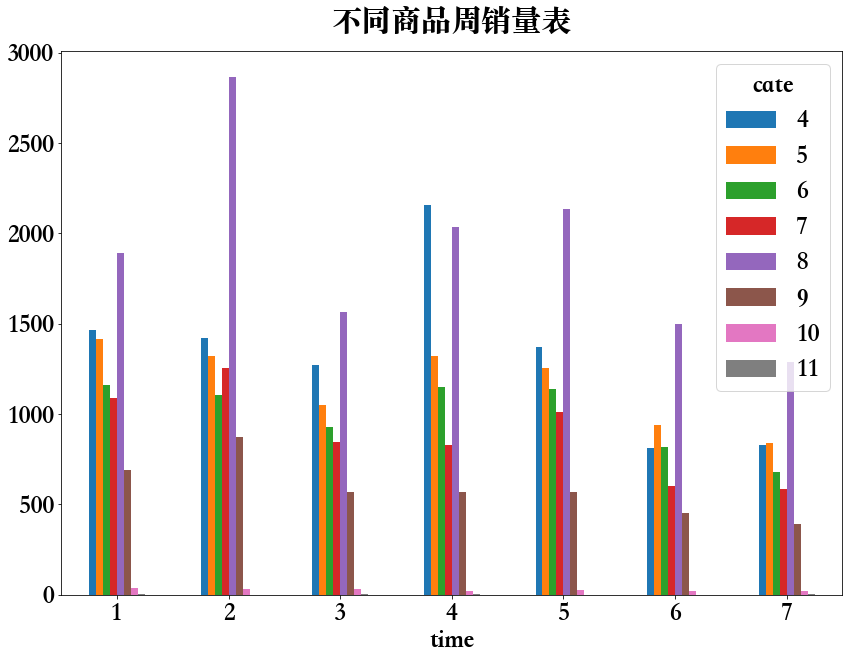

In [30]:
# 周一到周日每天购买商品类别数量统计
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['font.size'] = 25

df_product = df_ac['brand'].groupby([df_ac['time'],df_ac['cate']]).count()

df_product = df_product.unstack()

df_product.plot(kind='bar',figsize=(14,10),rot = 0)

plt.title(label='不同商品周销量表',pad = 20)
# plt.savefig('./16-不同商品周销量表.png',dpi = 200)

In [31]:
df_ac

,cate,brand,type,time
0,9,306,4,1
1,4,174,4,1
2,5,78,4,1
3,5,78,4,1
4,4,306,4,1
...,...,...,...,...
48247,8,214,4,5
48248,5,306,4,5
48249,8,214,4,5
48250,6,306,4,5


In [32]:
df_product = df_ac['brand'].groupby([df_ac['time'],df_ac['cate']]).count()
df_product.head(10)

time  cate
1     4       1466
      5       1417
      6       1162
      7       1089
      8       1892
      9        691
      10        39
      11         3
2     4       1421
      5       1320
Name: brand, dtype: int64

In [34]:
df_product = df_ac['type'].groupby([df_ac['time'],df_ac['cate']]).count()
df_product.head(10)

time  cate
1     4       1466
      5       1417
      6       1162
      7       1089
      8       1892
      9        691
      10        39
      11         3
2     4       1421
      5       1320
Name: type, dtype: int64

In [35]:
df_product.unstack()

cate,4,5,6,7,8,9,10,11
time,,,,,,,,
1,1466.0,1417.0,1162.0,1089.0,1892.0,691.0,39.0,3.0
2,1421.0,1320.0,1103.0,1255.0,2866.0,872.0,32.0,NaN
3,1270.0,1048.0,929.0,846.0,1567.0,566.0,32.0,4.0
4,2155.0,1321.0,1149.0,827.0,2034.0,566.0,20.0,6.0
5,1373.0,1253.0,1141.0,1012.0,2135.0,566.0,25.0,NaN
6,811.0,937.0,820.0,601.0,1501.0,453.0,20.0,NaN
7,830.0,842.0,678.0,584.0,1286.0,390.0,21.0,5.0


分析：星期二买类别8的最多，星期天最少。

# 每月各类商品销售情况（只关注商品8）

## 加载全部数据

In [36]:
df_ac2 = get_from_action_data(fname=ACTION_201602_FILE)
# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac2['time'] = pd.to_datetime(df_ac2['time']).apply(lambda x: x.day)

df_ac3 = get_from_action_data(fname=ACTION_201603_FILE)
# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac3['time'] = pd.to_datetime(df_ac3['time']).apply(lambda x: x.day)

df_ac4 = get_from_action_data(fname=ACTION_201604_FILE)
# 将time字段转换为datetime类型并使用lambda匿名函数将时间time转换为天
df_ac4['time'] = pd.to_datetime(df_ac4['time']).apply(lambda x: x.day)

Iteration is stopped
Iteration is stopped
Iteration is stopped


## 商品8每月销售数据按天分组聚合统计销量

In [38]:
dc_cate2 = df_ac2[df_ac2['cate']==8]
dc_cate2 = dc_cate2['brand'].groupby(dc_cate2['time']).count()
display(dc_cate2.head())
dc_cate2 = dc_cate2.to_frame().reset_index()
display(dc_cate2.head())
dc_cate2.columns = ['day', 'product_num']

dc_cate3 = df_ac3[df_ac3['cate']==8]
dc_cate3 = dc_cate3['brand'].groupby(dc_cate3['time']).count()
dc_cate3 = dc_cate3.to_frame().reset_index()
dc_cate3.columns = ['day', 'product_num']

dc_cate4 = df_ac4[df_ac4['cate']==8]
dc_cate4 = dc_cate4['brand'].groupby(dc_cate4['time']).count()
dc_cate4 = dc_cate4.to_frame().reset_index()
dc_cate4.columns = ['day', 'product_num']

time
1    90
2    84
3    78
4    47
5    26
Name: brand, dtype: int64

,time,brand
0,1,90
1,2,84
2,3,78
3,4,47
4,5,26


In [39]:
dc_cate2.head()

,day,product_num
0,1,90
1,2,84
2,3,78
3,4,47
4,5,26


## 商品8按天统计销量可视化

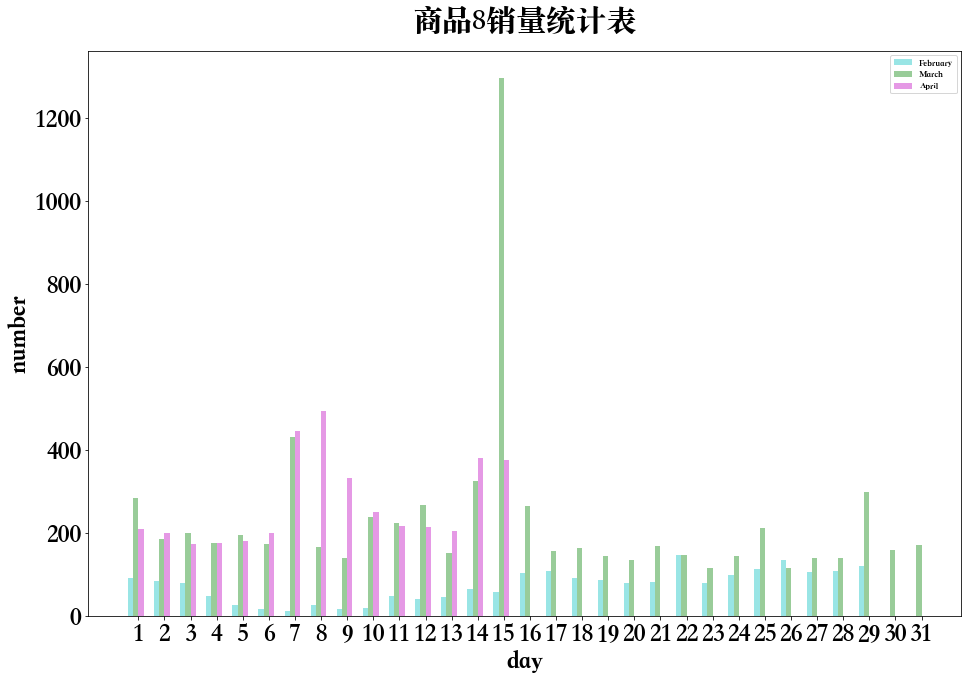

In [41]:
# 条形宽度
bar_width = 0.2
# 透明度
opacity = 0.4
# 天数
day_range = range(1,len(dc_cate3['day']) + 1, 1)
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['font.size'] = 25
# 设置图片大小
plt.figure(figsize=(14,10))

plt.bar(dc_cate2['day'], dc_cate2['product_num'], bar_width, 
        alpha=opacity, color='c', label='February')
plt.bar(dc_cate3['day']+bar_width, dc_cate3['product_num'], 
        bar_width, alpha=opacity, color='g', label='March')
plt.bar(dc_cate4['day']+bar_width*2, dc_cate4['product_num'], 
        bar_width, alpha=opacity, color='m', label='April')

plt.xlabel('day')
plt.ylabel('number')
plt.title('商品8销量统计表',pad = 20)
plt.xticks(dc_cate3['day'] + bar_width * 3 / 2., day_range)
plt.tight_layout() 

plt.legend(prop={'size':9})
# plt.savefig('./17-商品8每月按天统计销量可视化.png',dpi = 200)

分析：2月份对类别8商品的购买普遍偏低，3，4月份普遍偏高，3月15日购买极其多！可以对比3月份的销售记录，发现类别8将近占了3月15日总销售的一半！同时发现，3,4月份类别8销售记录在前半个月特别相似，除了4月8号，9号和3月15号。

# 查看特定用户对特定商品的的轨迹

## 定义函数筛选用户--商品数据

In [42]:
def spec_ui_action_data(fname, user_id, item_id, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    df_ac = df_ac[(df_ac['user_id'] == user_id) & (df_ac['sku_id'] == item_id)]

    return df_ac

## 筛选全部数据

In [43]:
def explore_user_item_via_time():
    user_id = 266079
    item_id = 138778
    df_ac = []
    
    df_ac.append(spec_ui_action_data(ACTION_201602_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201603_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201604_FILE, user_id, item_id))
    
    df_ac = pd.concat(df_ac, ignore_index=False)
    print(df_ac.sort_values(by='time'))

## 进行用户和商品数据筛选

In [44]:
explore_user_item_via_time()

Iteration is stopped
Iteration is stopped
Iteration is stopped
    user_id  sku_id  type                 time
0    266079  138778     1  2016-01-31 23:59:02
1    266079  138778     6  2016-01-31 23:59:03
15   266079  138778     6  2016-01-31 23:59:40
